<a href="https://colab.research.google.com/github/easton-hy/Developer.Portfolio/blob/main/Pendulum_lqr_GP_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Setup

In [ ]:
!mkdir -p ML4KP

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wzfLjuM18c7axsQgyk_jLYNVctnt-cYN' -O ML4KP/libpyDirtMP.so
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1DAi9cnicJYERbgu6EOX-SgvxcRARqGKW' -O ML4KP/examples.zip
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Woxu2sbftyLsIwPUSE3uwWD0P1CreLKz' -O ML4KP/resources.zip

!unzip -q -o ML4KP/examples.zip -d ML4KP/
!unzip -q -o ML4KP/resources.zip -d ML4KP/
!ls /content/ML4KP
!ls /content/ML4KP/examples

import os
import sys
sys.path.append('/content/ML4KP/')
sys.path.append('/content/ML4KP/examples/tripods')
sys.path.append('/content/ML4KP/examples/tripods-noise')
os.environ['DIRTMP_PATH'] = '/content/ML4KP/'
import libpyDirtMP as prx
print(prx.PRX_PI)

--2023-04-17 17:39:05--  https://docs.google.com/uc?export=download&id=1wzfLjuM18c7axsQgyk_jLYNVctnt-cYN
Resolving docs.google.com (docs.google.com)... 74.125.134.113, 74.125.134.139, 74.125.134.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jc8me7b8lgbvaois4cdp305e7ukacm33/1681753125000/11211328413468080056/*/1wzfLjuM18c7axsQgyk_jLYNVctnt-cYN?e=download&uuid=939a1466-0b36-4d25-bc2d-7f6b0713b2e3 [following]
--2023-04-17 17:39:07--  https://doc-0s-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jc8me7b8lgbvaois4cdp305e7ukacm33/1681753125000/11211328413468080056/*/1wzfLjuM18c7axsQgyk_jLYNVctnt-cYN?e=download&uuid=939a1466-0b36-4d25-bc2d-7f6b0713b2e3
Resolving doc-0s-5s-docs.googleusercontent.com (doc-0s-5s-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0

Import topological tools

In [ ]:
!pip install CMGDB
!pip install pychomp2
!git clone https://github.com/Ewerton-Vieira/RoA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 kB 2.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 3.3 MB/s eta 0:00:00
Cloning into 'RoA'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 87 (delta 7), reused 0 (delta 0), pack-reused 68
Unpacking objects: 100% (87/87), 75.61 KiB | 1.89 MiB/s, done.


In [ ]:
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp39-cp39-linux_x86_64.whl size=3288062 sha256=86064c1e2ab378ff373b35620447978e7a1c99f719c7e320f841c6656e87ed16
  Stored in directory: /root/.cache/pip/wheels/78/fd/57/7c1e4a6f9a5380e2536af9809075ba085b1bb8d38ee84ea183
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102564 sha256=21c7ec0dd94a2f27b33a32d2a2ca93cf7c5ae35e32d593cd417dc6f4913b0f99
  Stored in directory: /root/.cache/pip/wheels/9c/5f/9b/c4273ae8f869387214be2b99598d1b71dbf00672576cb85e74
Successfully built GPy paramz


Import packages

In [ ]:
import os
import sys

os.environ['PYTHONPATH'] = '/content/ML4KP/:/content/ML4KP/examples/tripods:/content/Discrete_Dyn'
os.environ['Torch_DIR'] = '/content/ML4KP/libtorch/'

sys.path.append('/content/ML4KP/examples/tripods')
sys.path.append('/content/RoA')

import CMGDB_util
import RoA
import CMGDB
import TimeMap


import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import csv


import GP_function

In [ ]:
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor

## Helper functions

In [ ]:
def choose_point(add, seed, boxes):
    """
    The function is to sample points in specified regions
    """
    np.random.seed(seed)
    random.shuffle(boxes)
    xnew = np.zeros((1, 2))
    ynew = np.zeros((1, 2))

    count = 0
    i = 0
    while count < add:
      xmin, ymin, xmax, ymax = morse_graph.phase_space_box(boxes[i])
      if (((xmin > -1) & (ymin < 0)) or ((xmin < -1) & (ymin > 0)) or ((xmin > 1) & (ymin < 0)) or ((xmin < 1) & (ymin > 0))):
        xnew = np.append(xnew, MG_util.sample_points([xmin, ymin], [xmax, ymax], 1), axis = 0)
        count += 1
      i += 1
    ynew = np.array([g(i) for i in xnew[1:, ]])
    return xnew[1:, ], ynew

In [ ]:
# friendly colors
viridis = matplotlib.cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
orange = np.array([253/256, 174/256, 97/256, 1])
yellowish = np.array([233/256, 204/256, 50/256, 1])
newcolors[109:146, :] = orange
newcolors[219:, :] = yellowish
newcmp = matplotlib.colors.ListedColormap(newcolors)

# newcmp = matplotlib.cm.get_cmap('viridis', 256)

## Set dynamic system setting

In [ ]:
MG_util = CMGDB_util.CMGDB_util()

outpath = os.path.abspath(os.getcwd()) + "/output/"

sb = 12
subdiv_init = subdiv_min = subdiv_max = sb  # non adaptive proceedure

phase_periodic = [True, False]

x_min = -3.14159
x_max = 3.14159

y_min = -6.28318
y_max = 6.28318

# Define the parameters for CMGDB
lower_bounds = [x_min, y_min]
upper_bounds = [x_max, y_max]

time = 1

TM = TimeMap.TimeMap("pendulum_lc", time,
                     "examples/tripods/lc_roa.yaml")

def g(X):
    # Y = TM.pendulum_lc(X) # Pendulum + LC
    Y = TM.pendulum_lqr(X) # Pendulum + LQR
    return Y

Before create controller


## Dynamics with Gaussian Process, topology and adaptive strategy

In this section, we build Gaussian Process as surrogate models with sampling points, then build morse graphs and region of attractors for pendulum dynamics. Adaptive strategy will be used by sampling points in step $t$ based on the region of attractors in step $t-1$. Confidence level used in multivalued map for building morse graph will also be increased to get $95%$ confidence interval during sampling process.

Step 0: sample 300 initial points randomly with $m = -2$
- build Gaussian Process model
- set confidence level as $2^{-2}$ ($0.25 \sigma$), indicating that $m = -2$
- build morse graph and region of attractors

Step 1: adaptively sample 300 points with $m = -2$
- adaptive sample 300 points each step based on previous region of attractors
- build Gaussian Process model
- set confidence level as $2^{-2}$ ($\sigma$), indicating that $m = -2$
- build morse graph and region of attractors

Step 2: adaptively sample 300 points with $m = 0$
- adaptive sample 300 points each step based on previous region of attractors
- build Gaussian Process model
- set confidence level as $2^{0}$ ($\sigma$), indicating that $m = 0$
- build morse graph and region of attractors

Step 3: adaptively sample 300 points with $m = 1$
- adaptive sample 300 points each step based on previous region of attractors
- build Gaussian Process model
- set confidence level as $2^{1}$ ($2 \sigma$), indicating that $m = 1$
- build morse graph and region of attractors



### Step 0: Initial points with m = -2

#### Sampling

Randomly sample 300 initial points as the start.

In [ ]:
np.random.seed(132)  # specify a seed to generate points #

n = 300  # specify a number of initial points #

# generate training data
X = MG_util.sample_points(lower_bounds, upper_bounds, n)
Y = [g(x_) for x_ in X]
Y = np.array(Y)

#### Build Gaussian Process model

Fit Gaussian Process model with 300 initial points.

In [ ]:
# build GP models
GP = GP_function.GP(X, Y)
GP.skl_fit()

#### Build morse graph and region of attractors

At the beginning, we set a small number of confidence level for intervals in multivalued map, such as m = -2, indicating $2^{-2}$ confidence leve.

By applying Gaussian Process model with 300 initial sampling points as surrogate model, it's able to build morse graph and region of attractors.

0:00:40.221475


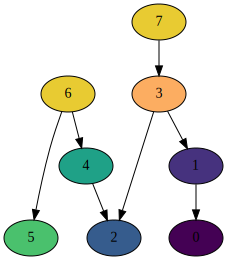

In [ ]:
# set confidence level
m = -2

def F(rect):
    return MG_util.Box_ptwise(GP.skl_learned_f, rect, n=m)

# base name for the output files
base_name = "pendulum_lqr_time" + \
    str(time) + "_" + \
    str(subdiv_init) + "_" + \
    "box_ptwise" + "_" + str(m) + "_0"

# build morse graph and map
morse_graph, map_graph = MG_util.run_CMGDB(
    subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F, base_name, subdiv_init, cmap=newcmp)

CMGDB.PlotMorseGraph(morse_graph, cmap=newcmp)

dictionary with volume of all Morse tiles = {6: 4.0673496301349745, 2: 27.160642790807106, 5: 22.18729584969388, 4: 0.48191346328613505, 0: 20.259641996549217, 3: 3.2384584732828254, 1: 0.07710615412578163, 7: 0.6939553871320344}


Text(-51.527777777777786, 0.5, '$\\dot \\theta$')

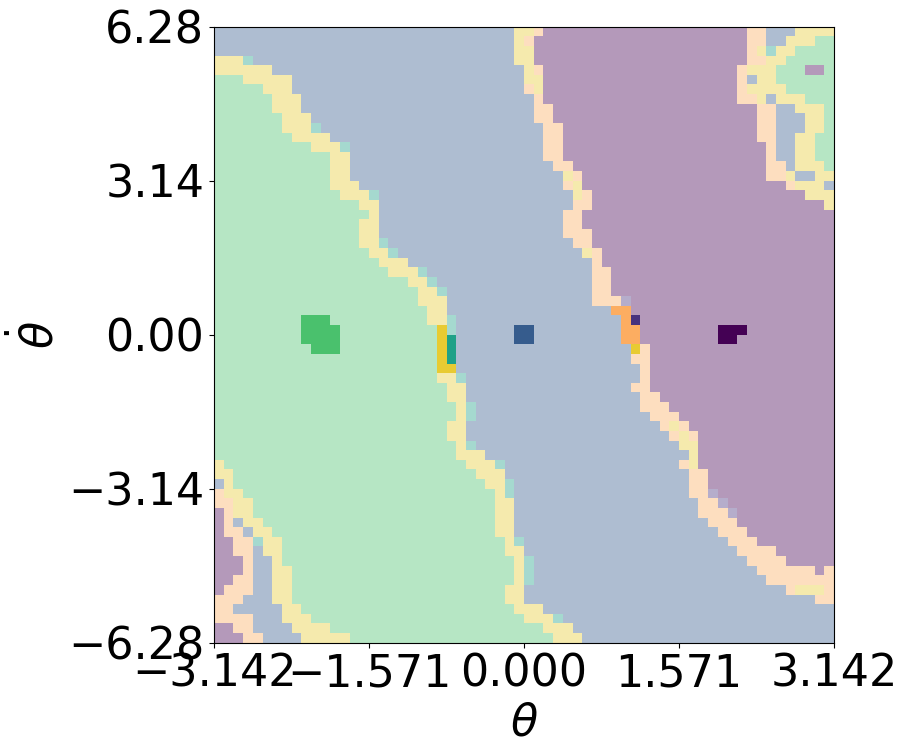

In [ ]:
# build region of attractors
roa = RoA.RoA(map_graph, morse_graph)

roa.save_file(base_name)

name_plot = base_name + "_RoA"
fig, ax = roa.PlotTiles(cmap=newcmp)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot \theta$")

### Step 1: Adaptive sampling 2 steps with m = -2

In this section, we apply adaptive sampling strategy and increase confidence level to $m = -2$. In the adaptive adding points procedure, we select 300 points each step from two parts.
- boundary parts (samll Vol value and region restriction)
- center attractor part

#### Adaptive sampling

In [ ]:
# sample first 300 points based on initial region of attractors
nt = roa.assign_morse_nodes2tiles()
retract_tiles, retract_indices = list(nt.values()), list(nt.keys())
Vol = roa.Morse_sets_vol()
idx = [k for k in Vol if Vol[k] < 10]
boxes1 = [retract_indices[i] for i in range(len(retract_tiles)) if retract_tiles[i] in idx]
boxes2 = [retract_indices[i] for i in range(len(retract_tiles)) if(retract_tiles[i] == retract_tiles[retract_indices.index(1706)])]

add = 150  # adding 150 in the boundary and 150 in the desired RoA
x1, y1 = choose_point(add, 123, boxes1)
x2, y2 = choose_point(add, 321, boxes2)

In [ ]:
# keep m = -2 to adaptive sample points
m = -2
def F(rect):
    return MG_util.Box_ptwise(GP.skl_learned_f, rect, n=m)

-------------- Step 1 --------------
0:00:40.575250


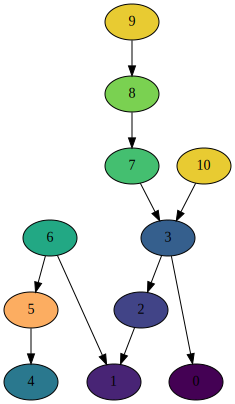

In [ ]:
x_add = X.copy()
y_add = Y.copy()

i=1
print("-------------- Step " + str(i) + " --------------")

# add new points
x_add = np.append(x_add, np.append(x1, x2, axis = 0), axis = 0)
y_add = np.append(y_add, np.append(y1, y2, axis = 0), axis = 0)

# build Gaussian Process model
GP = GP_function.GP(x_add, y_add)
GP.skl_fit()

base_name = "pendulum_lqr_time" + \
str(time) + "_" + \
str(subdiv_init) + "_" + \
"box_ptwise" + "_" + str(m) + "_" + str(i+1)

# build morse graph and map
morse_graph, map_graph = MG_util.run_CMGDB(
subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F, base_name, subdiv_init, cmap=newcmp)


CMGDB.PlotMorseGraph(morse_graph, cmap=newcmp)

dictionary with volume of all Morse tiles = {4: 19.797005071794498, 1: 29.7629754925524, 0: 20.58734315158381, 3: 1.8312711604873178, 7: 1.0602096192294974, 6: 4.028796553072083, 9: 0.34697769356601726, 10: 0.13493576972011787, 2: 0.19276538531445406, 5: 0.05782961559433622, 8: 0.05782961559433622}


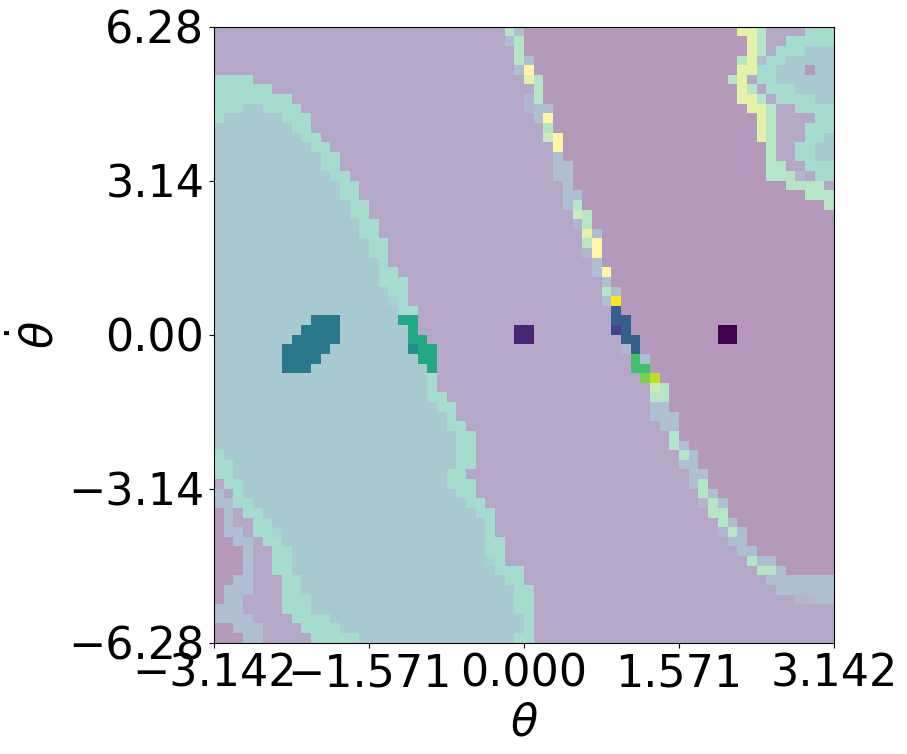

In [ ]:
# build region of attractors
roa = RoA.RoA(map_graph, morse_graph)

name_plot = base_name + "_RoA"
fig, ax = roa.PlotTiles()
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot \theta$")
plt.show()

# select new points in the current region of attractors
nt = roa.assign_morse_nodes2tiles()
retract_tiles, retract_indices = list(nt.values()), list(nt.keys())
Vol = roa.Morse_sets_vol()
idx = [k for k in Vol if Vol[k] < 10]
boxes1 = [retract_indices[i] for i in range(len(retract_tiles)) if retract_tiles[i] in idx]
boxes2 = [retract_indices[i] for i in range(len(retract_tiles)) if(retract_tiles[i] == retract_tiles[retract_indices.index(1706)] ) ]
x1, y1 = choose_point(add, 123*i, boxes1)
x2, y2 = choose_point(add, 321*i, boxes2)

### Step 2: Adaptive sampling 2 steps with m = 0

In this section, we also apply adaptive sampling strategy and increase confidence level to $m = 0$.

#### Adaptive sampling

In [ ]:
# increase confidence level from m = -2 to m = 0
m = 0
def F(rect):
    return MG_util.Box_ptwise(GP.skl_learned_f, rect, n=m)

-------------- Step 2 --------------
0:00:52.806101


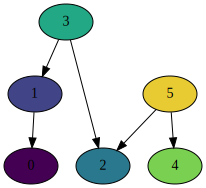

In [ ]:
i=2
print("-------------- Step " + str(i) + " --------------")

# add new points
x_add = np.append(x_add, np.append(x1, x2, axis = 0), axis = 0)
y_add = np.append(y_add, np.append(y1, y2, axis = 0), axis = 0)

# build Gaussian Process model
GP = GP_function.GP(x_add, y_add)
GP.skl_fit()

base_name = "pendulum_lqr_time" + \
str(time) + "_" + \
str(subdiv_init) + "_" + \
"box_ptwise" + "_" + str(m) + "_" + str(i+1)

# build morse graph and map
morse_graph, map_graph = MG_util.run_CMGDB(
subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F, base_name, subdiv_init, cmap=newcmp)

CMGDB.PlotMorseGraph(morse_graph, cmap=newcmp)

dictionary with volume of all Morse tiles = {4: 15.748931980190731, 2: 28.028087024722204, 5: 5.590196174119187, 0: 8.443123876773136, 1: 9.638269265722716, 3: 4.7805815557984666}


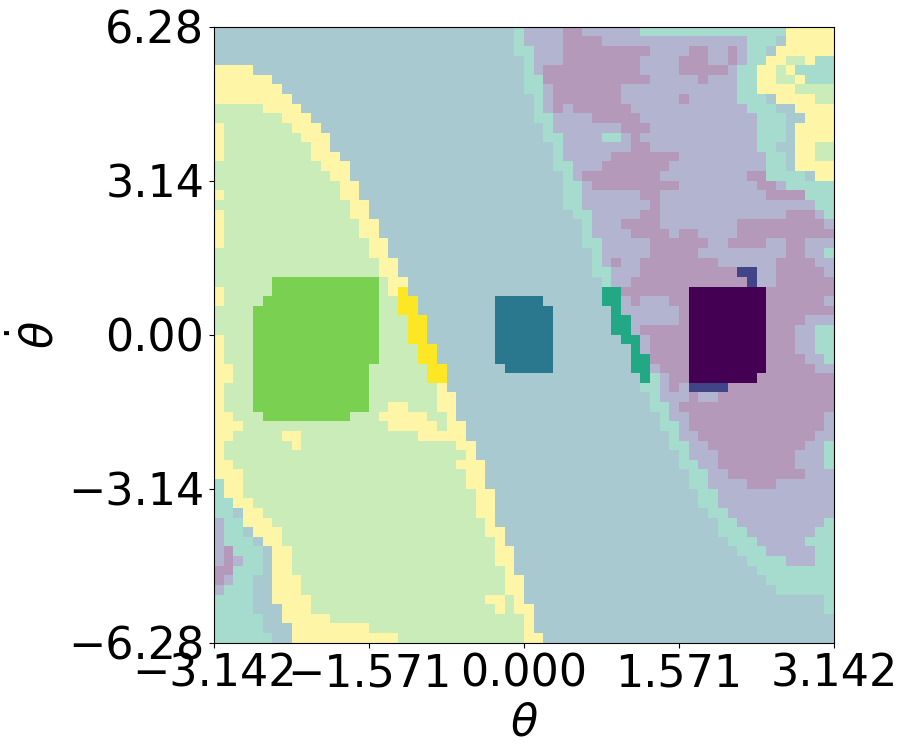

In [ ]:
# build region of attractors
roa = RoA.RoA(map_graph, morse_graph)

name_plot = base_name + "_RoA"
fig, ax = roa.PlotTiles()
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot \theta$")
plt.show()

# select new points in the current region of attractors
nt = roa.assign_morse_nodes2tiles()
retract_tiles, retract_indices = list(nt.values()), list(nt.keys())
Vol = roa.Morse_sets_vol()
idx = [k for k in Vol if Vol[k] < 10]
boxes1 = [retract_indices[i] for i in range(len(retract_tiles)) if retract_tiles[i] in idx]
boxes2 = [retract_indices[i] for i in range(len(retract_tiles)) if(retract_tiles[i] == retract_tiles[retract_indices.index(1706)])]
x1, y1 = choose_point(add, 124*i, boxes1)
x2, y2 = choose_point(add, 421*i, boxes2)

### Step 3: Adaptive sampling 3 steps with m = 1

In this section, we also apply adaptive sampling strategy and increase confidence level to $m = 1$.

#### Adaptive sampling

In [ ]:
# increase confidence level from m = 0 to m = 1
m = 1
def F(rect):
    return MG_util.Box_ptwise(GP.skl_learned_f, rect, n=m)

-------------- Step 3 --------------
0:01:27.643987


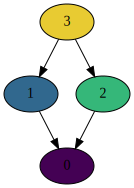

In [ ]:
i=3
print("-------------- Step " + str(i) + " --------------")

# add new points
x_add = np.append(x_add, np.append(x1, x2, axis = 0), axis = 0)
y_add = np.append(y_add, np.append(y1, y2, axis = 0), axis = 0)

# build Gaussian Process model
GP = GP_function.GP(x_add, y_add)
GP.skl_fit()

base_name = "pendulum_lqr_time" + \
str(time) + "_" + \
str(subdiv_init) + "_" + \
"box_ptwise" + "_" + str(m) + "_" + str(i+1)

# build morse graph and map
morse_graph, map_graph = MG_util.run_CMGDB(
subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F, base_name, subdiv_init, cmap=newcmp)

CMGDB.PlotMorseGraph(morse_graph, cmap=newcmp)

dictionary with volume of all Morse tiles = {0: 26.408857788080688, 1: 19.27653853144544, 3: 15.556166594876283, 2: 0.019276538531445408}


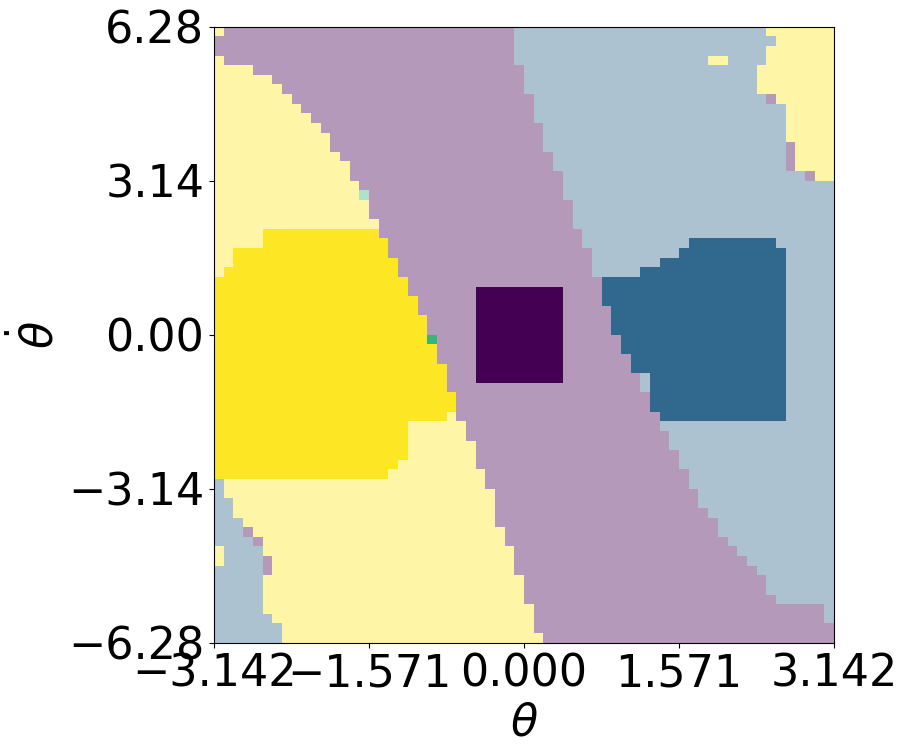

In [ ]:
# build region of attractors
roa = RoA.RoA(map_graph, morse_graph)

name_plot = base_name + "_RoA"
fig, ax = roa.PlotTiles()
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot \theta$")
plt.show()

# select new points in the current region of attractors
nt = roa.assign_morse_nodes2tiles()
retract_tiles, retract_indices = list(nt.values()), list(nt.keys())
Vol = roa.Morse_sets_vol()
boxes1 = [retract_indices[i] for i in range(len(retract_tiles)) if retract_tiles[i] != retract_tiles[retract_indices.index(1706)]]
boxes2 = [retract_indices[i] for i in range(len(retract_tiles)) if retract_tiles[i] == retract_tiles[retract_indices.index(1706)]]
x1, y1 = choose_point(add, 123*i, boxes1)
x2, y2 = choose_point(add, 321*i, boxes2)

## Gaussian Process model prediction standard deviation comparison

In [ ]:
def f_std(X):
    v1 = gp1.predict([X], return_std = True)[1][0]
    v2 = gp2.predict([X], return_std = True)[1][0]
    return [v1, v2]

def z_std(x, y):
    y_pred_std = [f_std(np.array([x[i, j], y[i, j]])) for i in range(100) for j in range(100)]
    return (np.array(y_pred_std)[:, 0]+np.array(y_pred_std)[:, 1]).reshape((100, 100))

In [ ]:
grid_x = np.linspace(lower_bounds[0], upper_bounds[0], 100)
grid_y = np.linspace(lower_bounds[1], upper_bounds[1], 100)
grid_X, grid_Y = np.meshgrid(grid_x, grid_y)

### First 300 initial points

In [ ]:
Xtrain = x_add[:300, :]
Ytrain = y_add[:300, :]
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-15, 1e15), nu=1.5) + WhiteKernel(noise_level_bounds=(1e-15, 1e15))
# kernel = RationalQuadratic()

n_restarts_optimizer = 9  # define a n_restarts_optimizerint value here #
gp_ = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
gp1 = gp_.fit(Xtrain, Ytrain[:, 0].reshape(-1, 1))
gp2 = gp_.fit(Xtrain, Ytrain[:, 1].reshape(-1, 1))

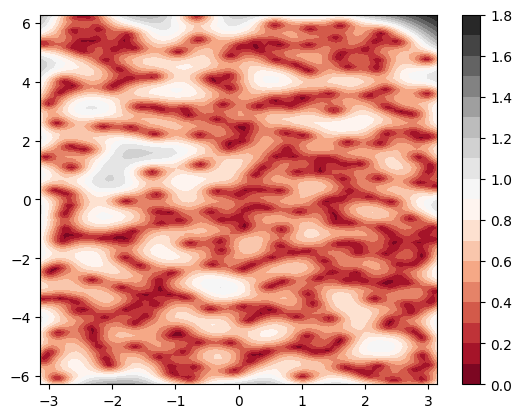

In [ ]:
grid_Z = z_std(grid_X, grid_Y)
plt.contourf(grid_X, grid_Y, grid_Z, 20, cmap='RdGy')
plt.colorbar()

### First 600 points (Step 1)

In [ ]:
Xtrain = x_add[:600, :]
Ytrain = y_add[:600, :]
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-15, 1e15), nu=1.5) + WhiteKernel(noise_level_bounds=(1e-15, 1e15))
# kernel = RationalQuadratic()

n_restarts_optimizer = 9  # define a n_restarts_optimizerint value here #
gp_ = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
gp1 = gp_.fit(Xtrain, Ytrain[:, 0].reshape(-1, 1))
gp2 = gp_.fit(Xtrain, Ytrain[:, 1].reshape(-1, 1))

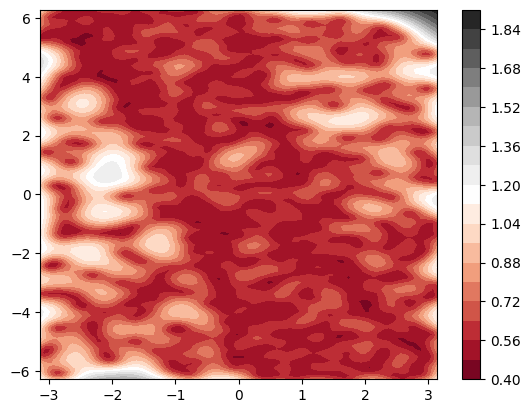

In [ ]:
grid_Z = z_std(grid_X, grid_Y)
plt.contourf(grid_X, grid_Y, grid_Z, 20, cmap='RdGy')
plt.colorbar()

### First 900 points (Step 2)

In [ ]:
Xtrain = x_add[:900, :]
Ytrain = y_add[:900, :]
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-15, 1e15), nu=1.5) + WhiteKernel(noise_level_bounds=(1e-15, 1e15))
# kernel = RationalQuadratic()

n_restarts_optimizer = 9  # define a n_restarts_optimizerint value here #
gp_ = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
gp1 = gp_.fit(Xtrain, Ytrain[:, 0].reshape(-1, 1))
gp2 = gp_.fit(Xtrain, Ytrain[:, 1].reshape(-1, 1))

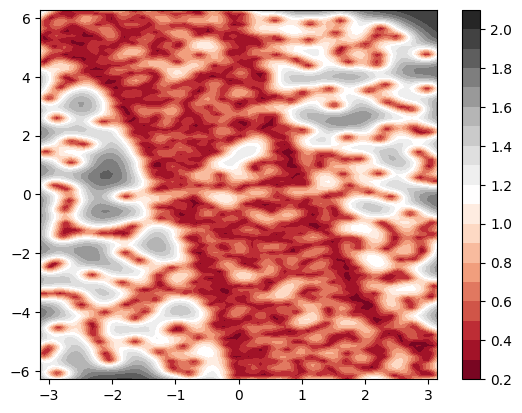

In [ ]:
grid_Z = z_std(grid_X, grid_Y)
plt.contourf(grid_X, grid_Y, grid_Z, 20, cmap='RdGy')
plt.colorbar()

### First 1200 points (Step 3)

In [ ]:
Xtrain = x_add
Ytrain = y_add
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-15, 1e15), nu=1.5) + WhiteKernel(noise_level_bounds=(1e-15, 1e15))
# kernel = RationalQuadratic()

n_restarts_optimizer = 9  # define a n_restarts_optimizerint value here #
gp_ = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=n_restarts_optimizer)
gp1 = gp_.fit(Xtrain, Ytrain[:, 0].reshape(-1, 1))
gp2 = gp_.fit(Xtrain, Ytrain[:, 1].reshape(-1, 1))

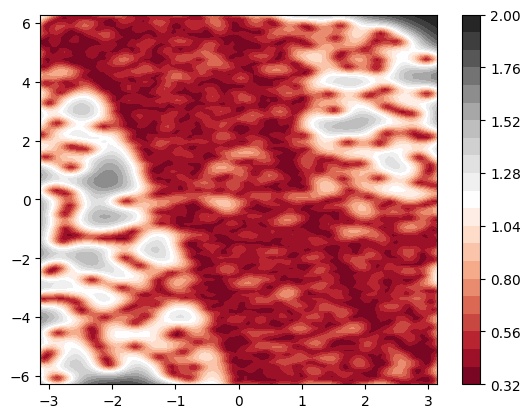

In [ ]:
grid_Z = z_std(grid_X, grid_Y)
plt.contourf(grid_X, grid_Y, grid_Z, 20, cmap='RdGy')
plt.colorbar()